## **测试 Simulation Test**

In [ ]:
# Implemented observation spaces for deep reinforcement learning: 
#   "DEFAULT":    motor angles and velocities, body orientation
#   "LR_COURSE_OBS":  [#0000FF TODO: what should you include? what is reasonable to measure on the real system? CPG states?] 

# Tasks to be learned with reinforcement learning
#     - "FWD_LOCOMOTION"
#         reward forward progress only
#     - "FLAGRUN"
#         move to goal, once reached, a new goal is randomly selected.
#     - "LR_COURSE_TASK" 
#         [#0000FF TODO: what should you train for?]
#         Ideally we want to command A1 to run in any direction while expending minimal energy
#         How will you construct your reward function? 

# Motor control modes:
#   - "TORQUE": 
#         supply raw torques to each motor (12)
#   - "PD": 
#         supply desired joint positions to each motor (12)
#         torques are computed based on the joint position/velocity error
#   - "CARTESIAN_PD": 
#         supply desired foot positions for each leg (12)
#         torques are computed based on the foot position/velocity error
#   - "CPG": 
#         supply desired CPG state modulations (8), mapped to foot positions
#         torques are computed based on inverse kinematics + joint PD (or you can add Cartesian PD)

# Terrain types:
#   -  None
#   - "SLOPES":
#   - "STAIRS":
#   - "GAPS":
#   - "RANDOM":

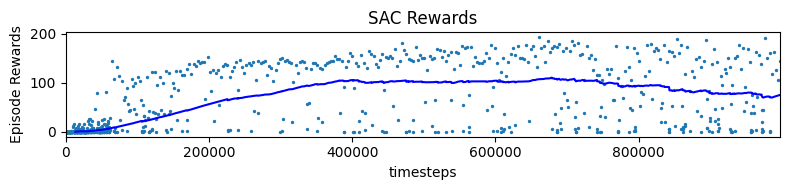

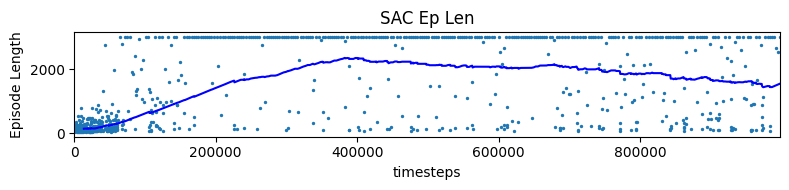

In [2]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings
test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/2501051727_diy_SAC_Noise_FLAT_Local_con_HEYUN")

test.set_env_config(render                 = True, 
                    motor_control_mode     = "DIY", 
                    task_env               = "LR_COURSE_TASK", #"FWD_LOCOMOTION", "FLAGRUN" , "LR_COURSE_TASK"
                    observation_space_mode = "LR_COURSE_OBS",
                    terrain                = None, #"SLOPES", #"RANDOM",  #None, 
                    add_noise              = True,
                    record_video           = False, 
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
# test.load_and_run()      # run simulation

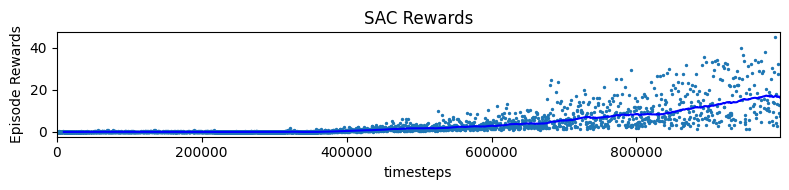

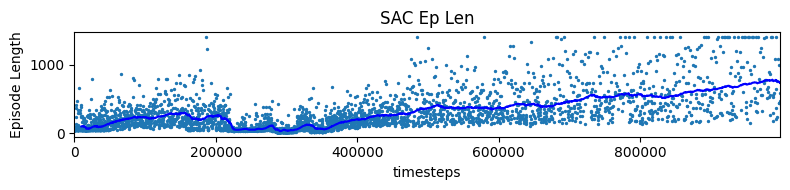

In [10]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings

test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/2412312056_diy_SAC_NoNoise_FLAT_new_Local")

test.set_env_config(render                 = True, 
                    motor_control_mode     = "DIY", 
                    task_env               = "FWD_LOCOMOTION", #"FWD_LOCOMOTION", "FLAGRUN" , "LR_COURSE_TASK"
                    observation_space_mode = "LR_COURSE_OBS",
                    terrain                = None, #"SLOPES", #"RANDOM",  #None, 
                    add_noise              = False,
                    record_video           = False, 
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
# test.load_and_run()    # run simulation


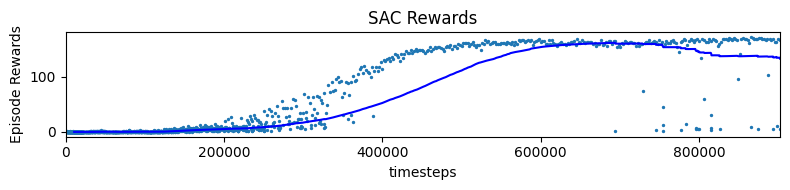

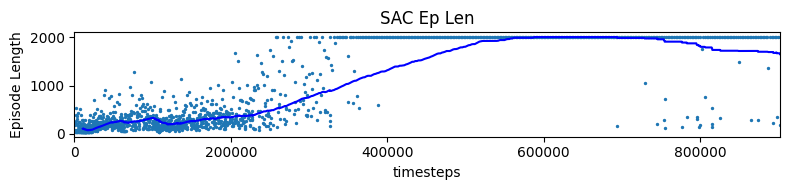

c:\Users\MATH-286-Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
c:\Users\MATH-286-Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(



Loaded model: ./logs/intermediate_models/122924022340\rl_model_900000_steps.zip

Episode reward: [3.22]
Final base position: (1.093761080890568, 0.00285555954433437, 0.4056777666026306)


error: Not connected to physics server.

In [3]:
# load_sb3.py Simplification
from tools.test import QuadrupedSimulation

# 配置 Settings

test = QuadrupedSimulation(algorithm="SAC",    # algorithm: "SAC", "PPO"
                           log_dir="./logs/intermediate_models/122924022340")

test.set_env_config(render                 = True, 
                    motor_control_mode     = "CPG", 
                    task_env               = "FWD_LOCOMOTION", #"FWD_LOCOMOTION", "FLAGRUN" , "LR_COURSE_TASK"
                    observation_space_mode = "LR_COURSE_OBS",
                    terrain                = None, "SLOPES", #"RANDOM",  #None, 
                    add_noise              = False, #True,
                    record_video           = False, 
                    )

test.load_plots()        # plot rewards in "0.monitor.csv"
test.load_and_run()      # run simulation

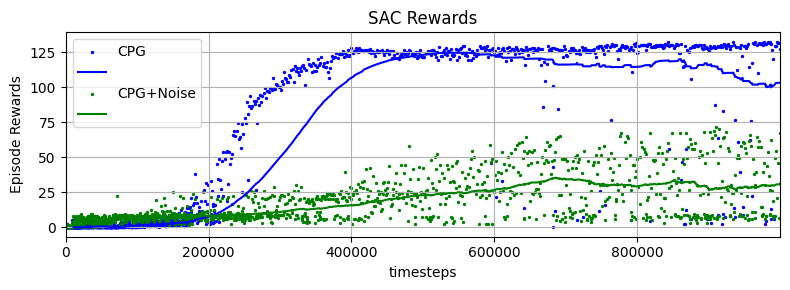

In [4]:
# 画图测试
from utils.utils import plot_results, plot_results_comparison

DEFAULT_PATH = "./logs/intermediate_models/"
# plot_results([DEFAULT_PATH + "2411101145_pd_SAC_NoNoise_FLAT_Local_new"],
#              10e10,
#              "timesteps",
#              "SAC ")

# plot_results_comparison([DEFAULT_PATH + "2411101145_pd_SAC_NoNoise_FLAT_Local_new"],
#                         [DEFAULT_PATH + "2412312056_diy_SAC_NoNoise_FLAT_new_Local"],
#                         'CPG',
#                         'CPG+',
#                         10e10,
#                         "timesteps",
#                         "SAC ",
#                         height = 3,)


plot_results_comparison([DEFAULT_PATH + "2412031414_cpg_SAC_FWD_1000k"],
                        [DEFAULT_PATH + "2412051256_cpg_SAC_SLOP_1000k_con_old"],
                        'CPG',
                        'CPG+Noise',
                        10e10,
                        "timesteps",
                        "SAC ",
                        height = 3)